<a href="https://colab.research.google.com/github/Niranjdatascientist/Machine-learning-project/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
df=pd.read_csv('/content/twitter_validation.csv',header=None,encoding='ISO-8859-1')
df

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.columns=['Id','Social Media','Target','Review']

In [ ]:
df.head()

,Id,Social Media,Target,Review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.tail()

,Id,Social Media,Target,Review
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
df.shape


(1000, 4)

In [ ]:
df.columns

Index(['Id', 'Social Media', 'Target', 'Review'], dtype='object')

In [ ]:
df.dtypes

Id               int64
Social Media    object
Target          object
Review          object
dtype: object

In [ ]:
df.isna().sum()

Id              0
Social Media    0
Target          0
Review          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1000 non-null   int64 
 1   Social Media  1000 non-null   object
 2   Target        1000 non-null   object
 3   Review        1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
df['Target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

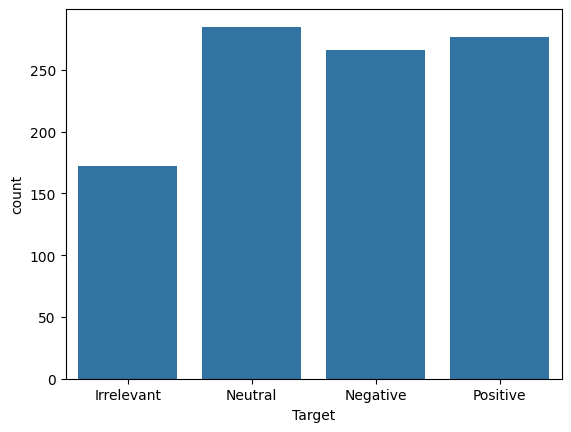

In [ ]:
sns.countplot(x='Target',data=df)

In [ ]:
df.drop(df.index[(df['Target']=='Irrelevant')],axis=0,inplace=True)
df

,Id,Social Media,Target,Review
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df['Target'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [ ]:
df.reset_index(drop=True,inplace=True)
df

,Id,Social Media,Target,Review
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.drop(['Id','Social Media'],axis=1,inplace=True)
df

,Target,Review
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df['Target']=df['Target'].map({'Positive':1,'Neutral':0,'Negative':-1})
df

,Target,Review
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
tweets=df.Review
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Review, Length: 828, dtype: object

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: Review, Length: 828, dtype: object

In [ ]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

<ipython-input-170-243a49c37bfd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: Review, Length: 828, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: Review, Length: 828, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: Review, Length: 828, dtype: object

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: Review, Length: 828, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)

In [ ]:
train_data.shape

(828, 3783)

In [ ]:
y=df['Target'].values

In [ ]:
x=train_data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
knn=KNeighborsClassifier(n_neighbors=7)
base=MultinomialNB()
svmm=SVC()
dtc=DecisionTreeClassifier(criterion='entropy')
rfc=RandomForestClassifier(n_estimators=5,criterion='entropy')
lst=[knn,base,svmm,dtc,rfc]
from sklearn.metrics import accuracy_score
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(accuracy_score(y_test,y_pred))

KNeighborsClassifier(n_neighbors=7)
0.46987951807228917
MultinomialNB()
0.5622489959839357
SVC()
0.5823293172690763
DecisionTreeClassifier(criterion='entropy')
0.46987951807228917
RandomForestClassifier(criterion='entropy', n_estimators=5)
0.46586345381526106
